In [2]:
from qiskit import *
from matplotlib import *
#pip install pylatexenc
%matplotlib inline


In [5]:
# From https://quantum-computing.ibm.com/ ibm cloud  copy API key specific to user  and store in text file <qc.key> for security purpose

IBMQ.ibmq.save_account( open('qc.key').read() )

# login to quantum computer
IBMQ.ibmq.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
# real ibm qc are called providers
IBMQ.ibmq.providers()
# hub='ibm-q' main  which has many sub real qc's and simulator run on ibm provider cloud
# now we will see all sub backends to connect by provider
provider=IBMQ.ibmq.get_provider('ibm-q')

provider.backends() # all quantum devices

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [11]:
# let me use 2nd one from list <ibmq_santiago>  real QC
provider.backends()[2]

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
circuit=QuantumCircuit(2,1)  # (qbit,cbit) cbit=1->  classicalbit  to store output  same as openQASM

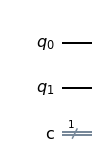

In [13]:
# just to see 
circuit.draw(output='mpl')   # mpl gives better look and feel from matplotlib

In [14]:
# applying pauli-x gate  to get reverse state of qubit like not gate

circuit.x(0)

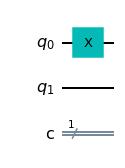

In [15]:
circuit.draw(output='mpl')  # gate applied to q0

In [16]:
# to measure qbuit and store in classical bit cbit

circuit.measure([0],[0])  # (qbit,cbit)

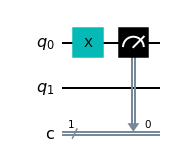

In [17]:
circuit.draw(output='mpl') # now we can see measure symbol is applied q0 x gate o/p stored in c

In [18]:
# pick real QC name ex<ibmq_santiago> connect to this backend
quantum_computer=provider.get_backend('ibmq_santiago')

In [19]:
# To see how jobs are running in backend , this below code will pop up tab <IBMQ Jobs>
import qiskit.tools.jupyter
%qiskit_job_watcher

# To run/execute this code  use 'execute'cmd  and store results  .result()
#execute (circuit or experient name given,backend, shots )
# by default 1024 shots circuit runs  from this we can get count like how many times our qbit is inrequired state
qc_job_result=execute(experiments=circuit,
                  backend=quantum_computer,
                  shots=1000).result()

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [25]:
# Detailed result  output
qc_job_result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='3dcff4df-89fb-4ff7-84e2-55623213f2b0', job_id='1a599f60-8fc6-478f-9474-09b92164df39', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1000}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=2, name='circuit-0', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2239903155, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 1, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0], 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'fusion': {'enabled': False}}, time_taken=0.00368169)], date=2022-04-23T12:19:35.119793, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backen

In [21]:
# to get specific extract output like count of qbits
qc_job_result.get_counts()

{'0': 38, '1': 962}

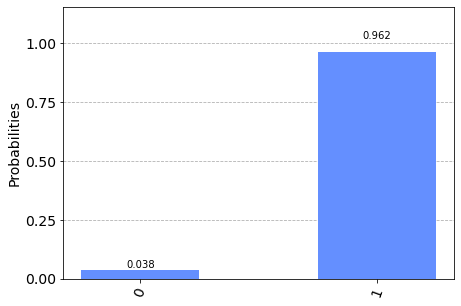

In [22]:
# to visualize in histogram like ibm composer
from qiskit.visualization import plot_histogram
plot_histogram(qc_job_result.get_counts())